In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
import numpy as np
import pandas as pd

from io import BytesIO
from PIL import Image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load('v1-w_full_EfficientNetV2-S.pth').eval().to(device)

In [3]:
class SquarePad:
	def __call__(self, image):
		w, h = image.size
		max_wh = np.max([w, h])
		hp = int((max_wh - w) / 2)
		vp = int((max_wh - h) / 2)
		padding = (hp, vp, hp, vp)
		return F.pad(image, padding, 0, 'constant')

transform = transforms.Compose([
	SquarePad(),
	transforms.Resize((256, 256)),
	transforms.ToTensor()
])

0.69


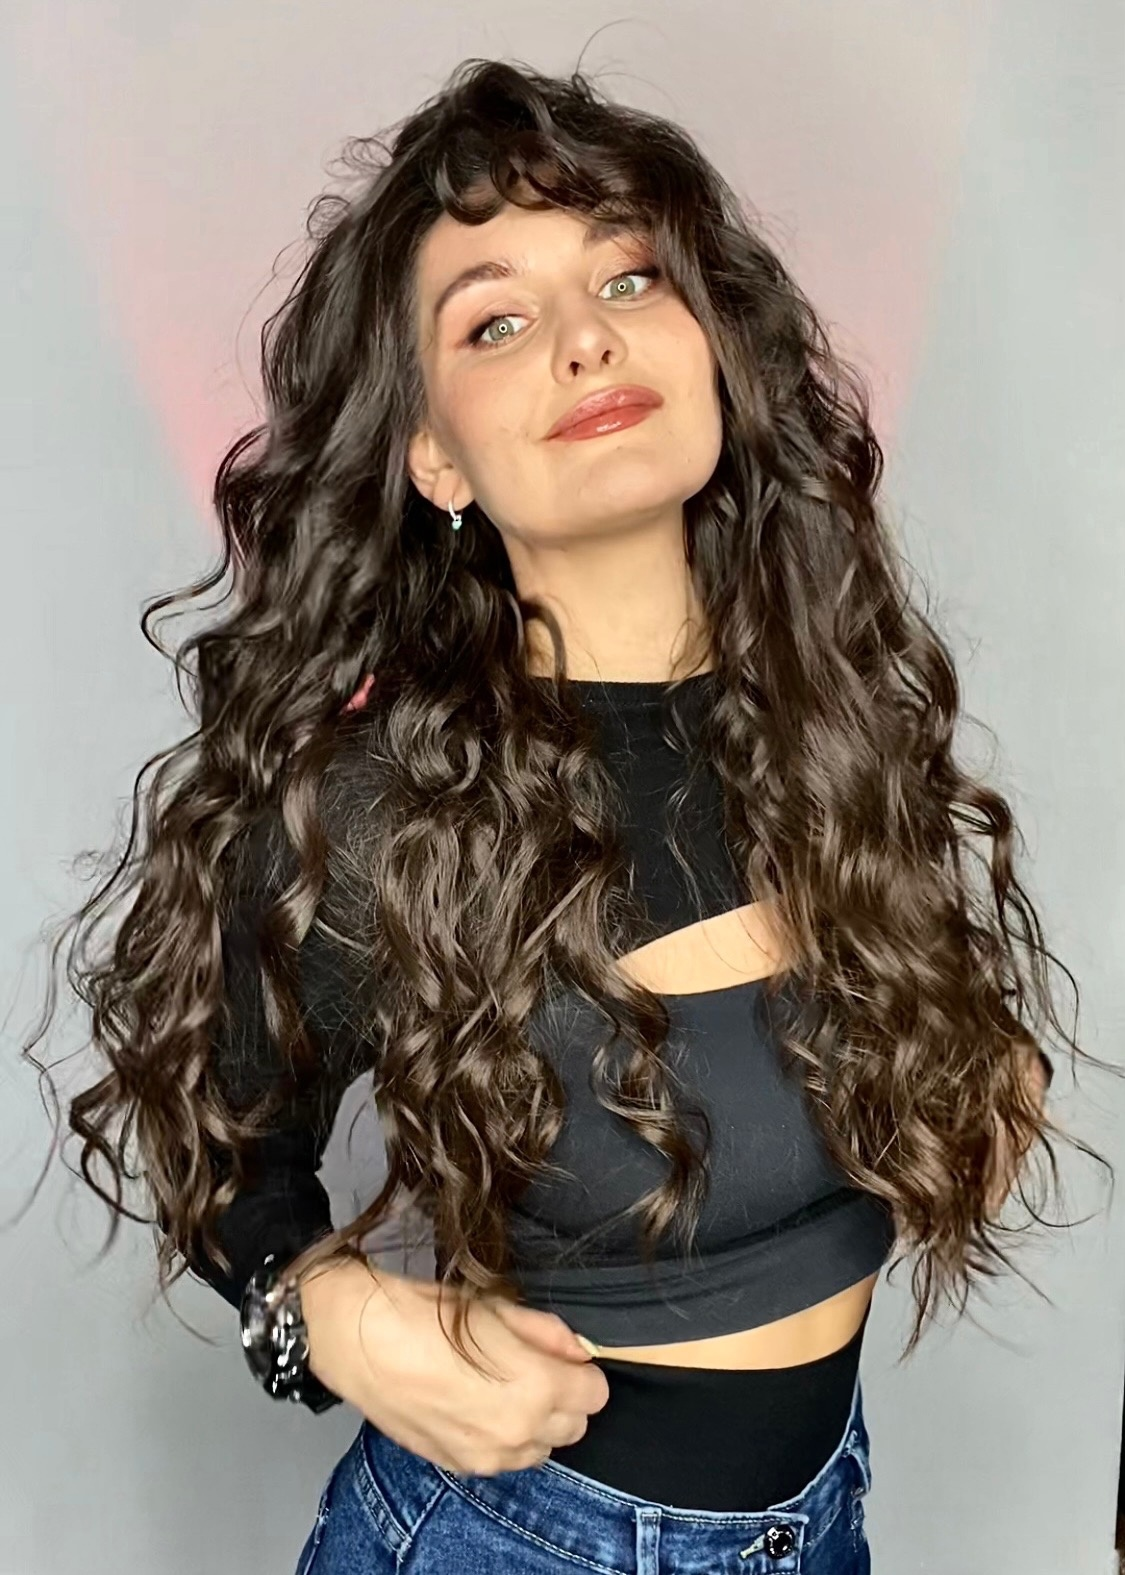

In [22]:
img = Image.open('10.png').convert('RGB')
input = transform(img).to(device)
input = input.reshape([1] + list(input.shape))

with torch.no_grad():
    result = model(input)

result = round(result.flatten()[0].item(), 2)
result = float(np.clip(result, 0, 10))
print(result)
img